In [88]:
import lanes

import glob

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

reload(lanes)

<module 'lanes' from 'lanes.py'>

In [5]:
import pandas as pd

In [11]:
%matplotlib inline

In [89]:
xx = lanes.create_video()

[MoviePy] >>>> Building video ./lane_lines.mp4
[MoviePy] Writing video ./lane_lines.mp4


100%|█████████▉| 1260/1261 [01:49<00:00, 11.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./lane_lines.mp4 



In [6]:
s = pd.Series(xx.skipped_frames.keys())

In [78]:
s.ix[250:]

250     539
251     540
252     541
253     542
254     543
255     544
256     545
257     546
258     547
259     548
260     549
261     550
262     551
263     552
264     553
265     554
266     555
267     556
268     558
269     560
270     561
271     562
272     563
273     564
274     565
275     566
276     567
277     568
278     569
279     570
       ... 
439    1146
440    1153
441    1154
442    1173
443    1174
444    1180
445    1184
446    1185
447    1186
448    1187
449    1224
450    1232
451    1236
452    1237
453    1239
454    1240
455    1241
456    1242
457    1243
458    1244
459    1247
460    1248
461    1249
462    1250
463    1253
464    1254
465    1255
466    1258
467    1259
468    1260
Length: 219, dtype: int64

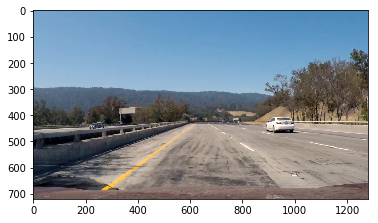

In [79]:
plt.imshow(xx.skipped_frames[556]['img'])

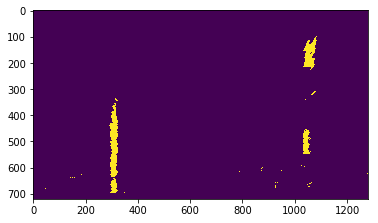

In [80]:
plt.imshow(xx.skipped_frames[556]['warped'])

In [20]:
# frames 240-350 - skipping because not parallel which is causing that bend

In [81]:
left, right = xx.fit_lines(xx.skipped_frames[556]['warped'])

In [82]:
lanes.is_close_parallel(left, right)

False

In [66]:
left[0]

1.8351372783544604e-05

In [67]:
right[0]

-4.6902708638327854e-05

In [69]:
1 - left[0] / right[0]

1.3912646692764405

In [70]:
def is_close_parallel(left_fit, right_fit, relative_epsilon=0.8):
    A_left, A_right = left_fit[0], right_fit[0]
    B_left, B_right = left_fit[1], right_fit[1]
    
    print(A_left, A_right)
    print(B_left, B_right)
    A = abs(1.0 - A_left / A_right) < relative_epsilon
    B = abs(1.0 - B_left / B_right) < relative_epsilon
    return A and B

In [83]:
is_close_parallel(left, right, 2)

(5.816377284088913e-05, 2.5236900576316049e-05)
(-0.06876449186516391, -0.064183634382068838)


True

In [54]:
100 / 1.

100.0

In [56]:
3.75 / .459

8.169934640522875

In [60]:
1 - .8/.7

-0.14285714285714302

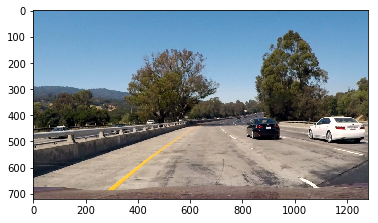

In [93]:
plt.imshow(mpimg.imread('./test_images/test1.jpg'))

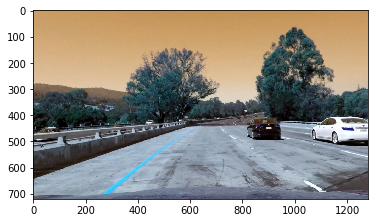

In [96]:
plt.imshow(xx.camera.undistort(cv2.imread('./test_images/test1.jpg')))

In [97]:
cv2.imwrite(
    './output_images/test1_undistort.jpg',
    xx.camera.undistort(cv2.imread('./test_images/test1.jpg')))

True

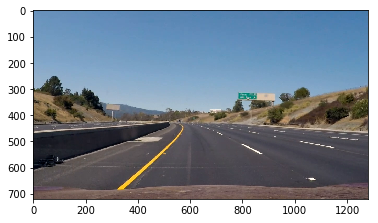

In [101]:
plt.imshow(xx.skipped_frames[12]['img'])

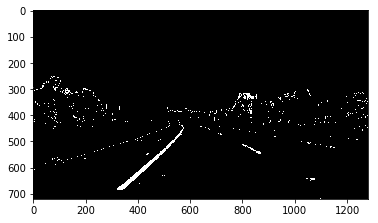

In [103]:
plt.imshow(lanes.threshold_by_color_and_gradient(xx.skipped_frames[12]['img']), cmap='gray')

In [112]:
mpimg.imsave('./output_images/binary_image_source.png', xx.skipped_frames[12]['img'])

In [113]:
mpimg.imsave('./output_images/binary_image.png', 
            lanes.threshold_by_color_and_gradient(xx.skipped_frames[12]['img']), cmap='gray')

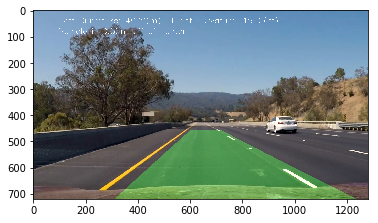

In [120]:
plt.imshow(xx.draw(xx.skipped_frames[507]['img']))

In [117]:
xx.skipped_frames.keys()

[512,
 520,
 10,
 523,
 12,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 547,
 548,
 549,
 550,
 558,
 564,
 565,
 571,
 572,
 578,
 581,
 582,
 583,
 584,
 590,
 594,
 595,
 596,
 597,
 617,
 1052,
 1244,
 1247,
 1248,
 1249,
 1258,
 1259,
 1260,
 1261,
 1262,
 979,
 803,
 804,
 305,
 306,
 307,
 310,
 311,
 312,
 313,
 334,
 335,
 336,
 337,
 338,
 340,
 349,
 350,
 351,
 352,
 354,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 396,
 397,
 410,
 413,
 414,
 420,
 421,
 423,
 424,
 425,
 426,
 427,
 436,
 438,
 445,
 446,
 447,
 448,
 449,
 450,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 982,
 983,
 984,
 474,
 475,
 481,
 482,
 483,
 487,
 488,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 506,
 507]